# Logistic Regression


Import essential libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

Train the logistic regression model and test thge accuracy using 80:20 split

In [30]:
data = pd.read_csv('heart.csv')
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)







Accuracy: 0.8532608695652174
Precision: 0.8921568627450981
Recall: 0.8504672897196262
F1-score: 0.8708133971291867


Calculate the confusion matrix using the `confusion_matrix` function from `sklearn.metrics`.
Create a plot using `matplotlib` to visualize the confusion matrix.
The plot shows the counts of true positives, true negatives, false positives, and false negatives.
The color intensity represents the count in each cell of the confusion matrix.


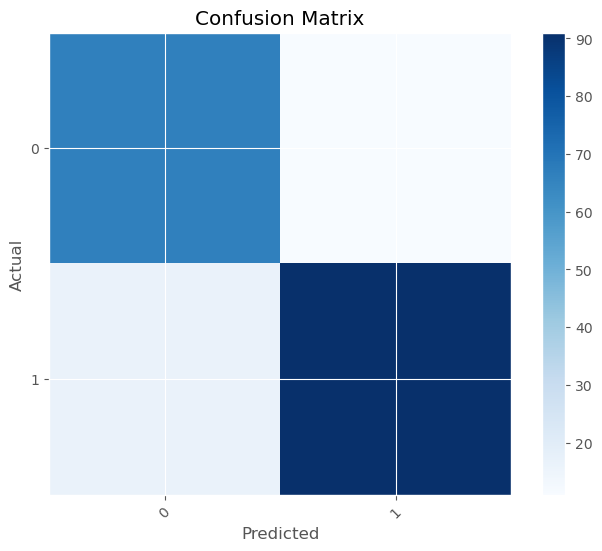

In [31]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(set(y_test)))
plt.xticks(tick_marks, set(y_test), rotation=45)
plt.yticks(tick_marks, set(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds.
Calculate the area under the ROC curve (AUC) using the `auc` function.
Create a plot to visualize the ROC curve.
The plot shows the trade-off between the FPR and TPR at different classification thresholds.
The AUC value is displayed in the legend, indicating the model's discriminatory power.

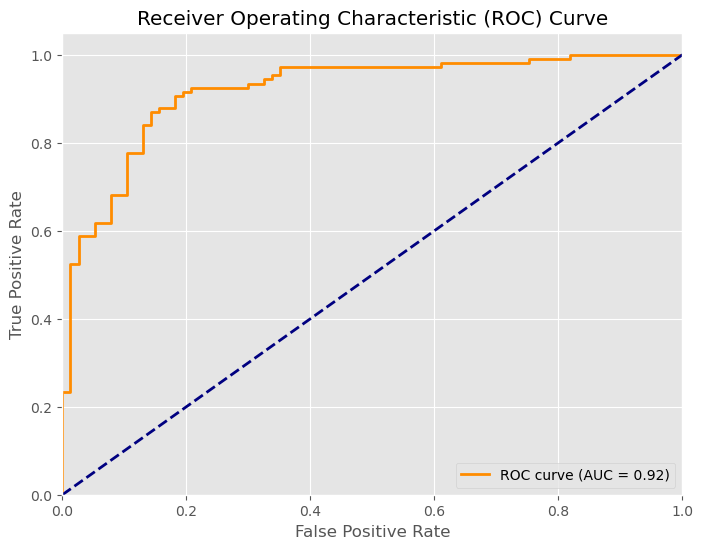

In [32]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()